Given the coin flip results: [1, 0, 1, 1, 1, 0, 0, 1, 1, 1], perform an MAP and MLE experiment to determine the
probability of each hypothesis with respect to the number of coin flips

H1: Likelihood = 0.00000
H2: Likelihood = 0.00043
H3: Likelihood = 0.00567
H4: Likelihood = 0.02255
H5: Likelihood = 0.05184
H6: Likelihood = 0.07910
H7: Likelihood = 0.06561
H8: Likelihood = 0.00000


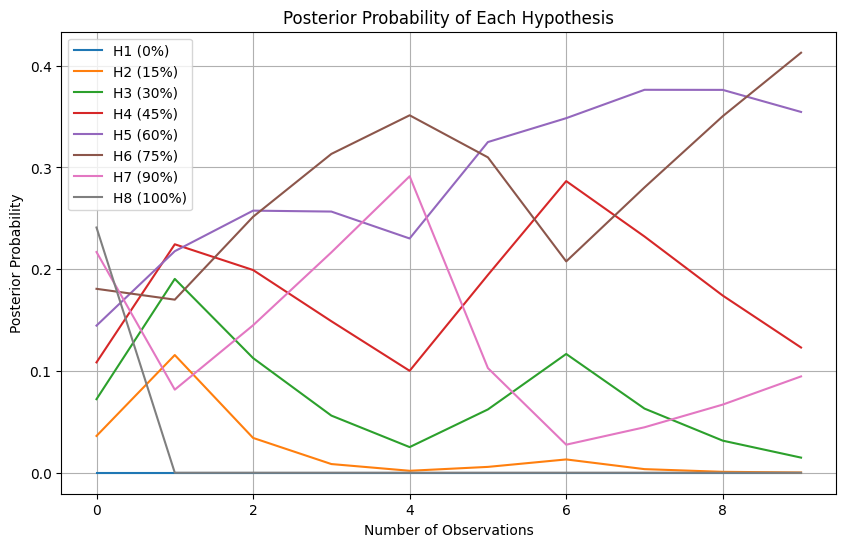

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hypotheses and their probabilities
hypotheses = np.array([0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1])
coin_flips = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

# Calculate the likelihood for the first five coin flips
first_five_flips = coin_flips[:5]
n_heads = np.sum(first_five_flips)
n_tails = len(first_five_flips) - n_heads

likelihoods = hypotheses**n_heads * (1 - hypotheses)**n_tails

# Print the likelihoods for the first five coin flips
for i, h in enumerate(hypotheses):
    print(f"H{i+1}: Likelihood = {likelihoods[i]:.5f}")

# Calculate the posterior probabilities for all coin flips
n_heads_total = np.cumsum(coin_flips)
n_tails_total = np.arange(1, len(coin_flips) + 1) - n_heads_total

posteriors = np.zeros((len(hypotheses), len(coin_flips)))

for i, h in enumerate(hypotheses):
    posteriors[i] = h**n_heads_total * (1 - h)**n_tails_total

# Normalize the posteriors
posteriors /= posteriors.sum(axis=0)

# Plot the posterior probabilities
plt.figure(figsize=(10, 6))
for i, h in enumerate(hypotheses):
    plt.plot(posteriors[i], label=f'H{i+1} ({h*100:.0f}%)')

plt.xlabel('Number of Observations')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability of Each Hypothesis')
plt.legend()
plt.grid(True)
plt.show()

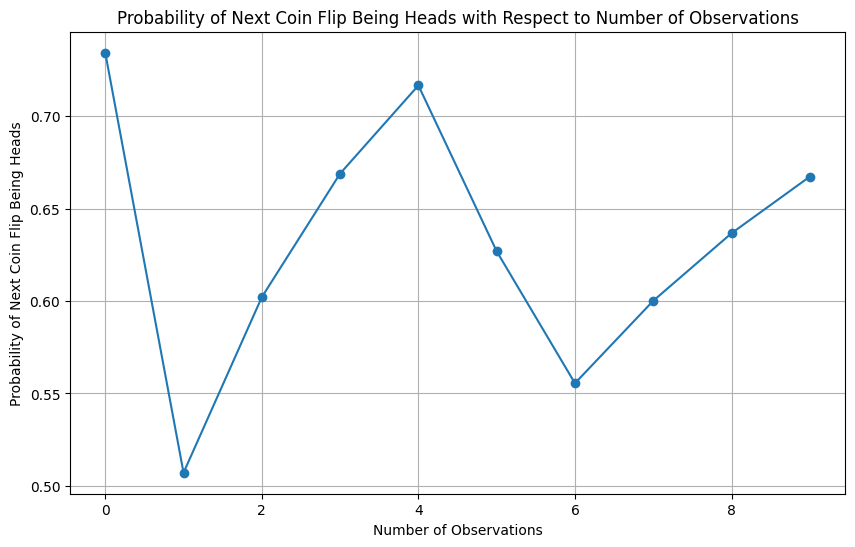

In [2]:
# Calculate the probability that the next coin flip is heads
prob_next_heads = np.sum(posteriors * hypotheses[:, np.newaxis], axis=0)

# Plot the probability that the next coin flip is heads
plt.figure(figsize=(10, 6))
plt.plot(prob_next_heads, marker='o')
plt.xlabel('Number of Observations')
plt.ylabel('Probability of Next Coin Flip Being Heads')
plt.title('Probability of Next Coin Flip Being Heads with Respect to Number of Observations')
plt.grid(True)
plt.show()

The most likely hypothesis after all observations are made can be determined by finding the hypothesis with the highest posterior probability at the last observation.

Given the `posteriors` array, we can find the index of the maximum value in the last column and use it to identify the corresponding hypothesis.



In [3]:
# Find the index of the maximum posterior probability at the last observation
most_likely_hypothesis_index = np.argmax(posteriors[:, -1])

# Get the most likely hypothesis
most_likely_hypothesis = hypotheses[most_likely_hypothesis_index]
print(f"The most likely hypothesis after all observations is: {most_likely_hypothesis}")


The most likely hypothesis after all observations is: 0.75
